# <font color='salmon'> Task 3: Customer Churn Prediction using Random Forest Classifier</font>
### by Hamza Thamlaoui


<a href="https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction" style="text-decoration: underline; font-weight: bold;">
    Click here to access the Data
</a>


In [22]:
# import necessary liabraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Load the dataset into pandas dataframe

data = pd.read_csv('Churn_Modelling.csv')

# Display the first few rows and column information
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
data.shape

(10000, 14)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:
# Dropping unnecessary columns
data = data.drop(columns=['Surname', 'CustomerId'])
print(data.columns)


Index(['RowNumber', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


In [32]:
print(data.duplicated().sum())

0


In [34]:
data.isnull().sum()


RowNumber          0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [36]:
# Dummy code 'Gender' and 'Geography' and convert to integers
data = pd.get_dummies(data, columns=['Gender', 'Geography'], drop_first=True)
# Convert all dummy columns to integers
data = data.astype(int)  
print(data.head())

   RowNumber  CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0          1          619   42       2        0              1          1   
1          2          608   41       1    83807              1          0   
2          3          502   42       8   159660              3          1   
3          4          699   39       1        0              2          0   
4          5          850   43       2   125510              1          1   

   IsActiveMember  EstimatedSalary  Exited  Gender_Male  Geography_Germany  \
0               1           101348       1            0                  0   
1               1           112542       0            0                  0   
2               0           113931       1            0                  0   
3               0            93826       0            0                  0   
4               1            79084       0            0                  0   

   Geography_Spain  
0                0  
1                1  
2    

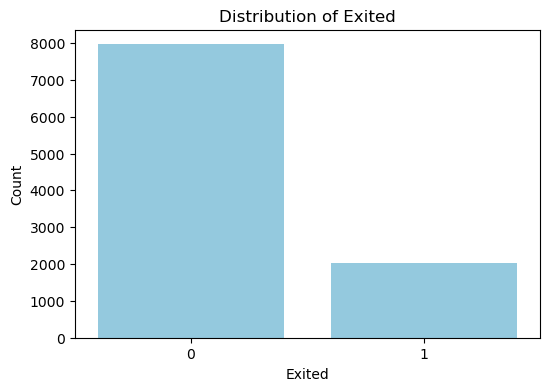

In [38]:
# Count plot for 'Exited' feature
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=data, color='skyblue')
plt.title('Distribution of Exited')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()


In [40]:
# Separate features (X) and target variable (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}\n\n")

# Display classification report 
print(classification_report(y_test, y_pred))




Accuracy: 0.866


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.48      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



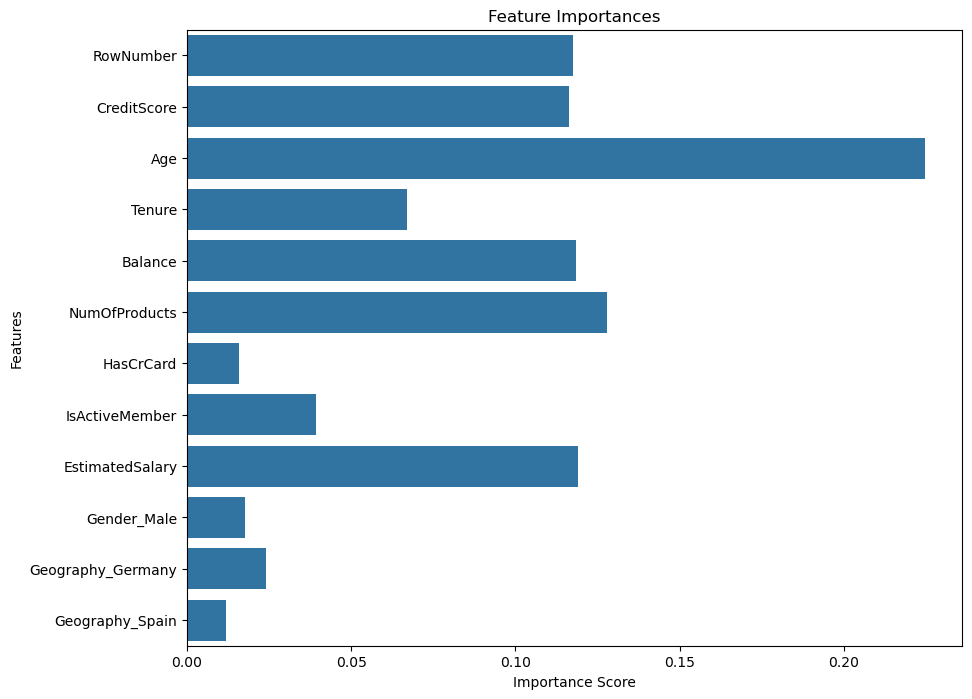

In [44]:
# Get feature importances from the trained model

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Plotting feature importances

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index, orient='h')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
